In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distirbuted solution with agent failure probability $p$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 50
fail_probability = [0, 0.05, 0.1]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=3042.7349290068314, L=-20000.0, U=-6.570874424510412
k=1, rel_gap=8.684992700219947, L=-63.63887083544529, U=-6.570874424510412
k=2, rel_gap=5.077882911494502, L=-63.63887083545702, U=-10.470565452174652


/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=3, rel_gap=1.1128768087251821, L=-63.638870840632414, U=-30.119536821945307
k=4, rel_gap=0.49960483080231405, L=-63.638870835466356, U=-42.43709377851129
k=5, rel_gap=0.321097233305785, L=-63.63887083546851, U=-48.17122406367077
k=6, rel_gap=0.20118226401069586, L=-63.63887083547505, U=-52.98019521449443
k=7, rel_gap=0.13800833365002768, L=-63.63887083547109, U=-55.92126960209237
k=8, rel_gap=0.10114069651852287, L=-63.41352456009326, U=-57.58893914336999
k=9, rel_gap=0.07031880765466471, L=-63.41352456011361, U=-59.247323420456794
k=10, rel_gap=0.053425747747075196, L=-63.29458893590408, U=-60.08452809442906
k=11, rel_gap=0.034997126100950585, L=-63.10506834829246, U=-60.97124982947767
k=12, rel_gap=0.019396606262951418, L=-62.80581617705071, U=-61.61077620936288
k=13, rel_gap=0.014454514868226376, L=-62.805816177076416, U=-61.91092380838252
k=14, rel_gap=0.01033670141683168, L=-62.79120132703292, U=-62.14878786347022
k=15, rel_gap=0.005952377492710899, L=-62.6881866936818, U=-62.31

k=4, rel_gap=1.3465031298298367, L=-63.638870835466, U=-27.120727019904276
k=5, rel_gap=1.346503129829985, L=-63.63887083547002, U=-27.120727019904276
k=6, rel_gap=1.34650312983002, L=-63.638870835470975, U=-27.120727019904276
k=7, rel_gap=0.44143594516671103, L=-63.63887083547006, U=-44.14963498645778
k=8, rel_gap=0.4414359451667146, L=-63.638870835470215, U=-44.14963498645778
k=9, rel_gap=0.4414359451667384, L=-63.638870835471266, U=-44.14963498645778
k=10, rel_gap=0.4414359451667569, L=-63.63887083547208, U=-44.14963498645778
k=11, rel_gap=0.4414359451667799, L=-63.6388708354731, U=-44.14963498645778
k=12, rel_gap=0.44143594516673373, L=-63.63887083547106, U=-44.14963498645778
k=13, rel_gap=0.4414359451667461, L=-63.63887083547161, U=-44.14963498645778
k=14, rel_gap=0.18606777018930107, L=-63.638870835471806, U=-53.655341149110555
k=15, rel_gap=0.17732270245433587, L=-63.16965124278017, U=-53.655341149110555
k=16, rel_gap=0.09223032598450734, L=-63.032935794597385, U=-57.71029634961

# Centralized solution

In [3]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

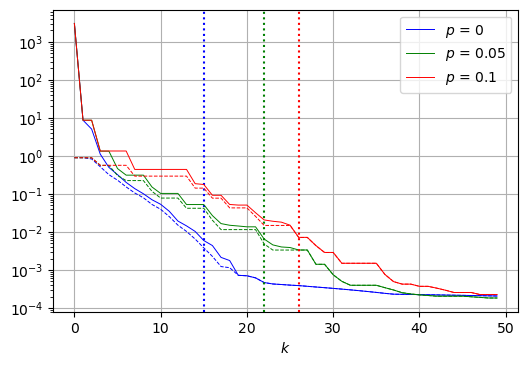

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)